# Práctica 3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis exploratorio

In [2]:
df = pd.read_csv("train_housing_data_italy.csv")
print(df.shape)
df.head()

(213409, 26)


,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,availability,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,siculiana,"villa unifamiliare via campo spoto 38, siculiana",46000.0,4.0,NaN,85.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,37.338086,13.421996
1,1.661114e+09,strongoli,"quadrilocale contrada tronga 211, tronca, stro...",120000.0,4.0,2.0,190.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,39.263959,17.052026
2,1.661114e+09,zelbio,"bilocale buono stato, piano terra, zelbio",55000.0,2.0,NaN,85.0,1.0,NaN,not free / other,...,0,1,0,1,0,0,0,0,45.904582,9.180539
3,1.661114e+09,villamagna,"casa colonica, da ristrutturare, 319 m², villa...",130000.0,4.0,NaN,319.0,1.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,42.333295,14.236808
4,1.661114e+09,vallefiorita,"appartamento corso italia, vallefiorita",30000.0,NaN,NaN,143.0,2.0,NaN,not free / other,...,0,0,0,1,0,0,0,0,38.776385,16.461003


In [3]:
df.isnull().sum()

timestamp                   0
location                    0
title                       0
price                   37478
n_rooms                 57848
floor                   69102
mq                       3889
n_bathrooms             13804
year_of_construction       10
availability                0
energy_class              648
status                      0
heating                     0
has_garage                  0
has_terrace                 0
has_garden                  0
has_balcony                 0
has_fireplace               0
has_alarm                   0
has_air_conditioning        0
has_pool                    0
has_parking                 0
has_elevator                0
is_furnished                0
latitude                   60
longitude                  60
dtype: int64

### *Las columnas con valores nulos son:*
- **price** $= 37,478$
- **n_rooms** $= 57,848$
- **floor** $= 69,102$
- **mq** $= 3,889$
- **n_bathrooms** $= 13,804$
- **year_of_construction** $= 10$
- **energy_class** $= 648$
- **latitude** $= 60$
- **longitude** $= 60$


In [4]:
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
213404    False
213405    False
213406    False
213407    False
213408    False
Length: 213409, dtype: bool


Se puede visualizar que no se tienen valores duplicados en el dataset

In [5]:
print(df.describe())

          timestamp         price        n_rooms          floor  \
count  2.134090e+05  1.759310e+05  155561.000000  144307.000000   
mean   1.661136e+09  2.413253e+05       3.503442       1.820466   
std    1.266113e+04  7.739356e+06       0.985594       1.134597   
min    1.661114e+09  1.000000e+00       2.000000       1.000000   
25%    1.661125e+09  7.700000e+04       3.000000       1.000000   
50%    1.661136e+09  1.350000e+05       3.000000       2.000000   
75%    1.661146e+09  2.350000e+05       4.000000       2.000000   
max    1.661159e+09  2.147484e+09       5.000000      52.000000   

                  mq    n_bathrooms  year_of_construction     has_garage  \
count  209520.000000  199605.000000         213399.000000  213409.000000   
mean      158.692311       1.587751           1965.096462       0.180292   
std       128.708312       0.668113             76.663750       0.384432   
min         1.000000       1.000000           1000.000000       0.000000   
25%        80.00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

## Creando dos variables nuevas

In [7]:
# Precio por metro cuadrado
df['price_per_mq'] = df['price'] / df['mq']

# Antiguedad de la propiedad
current_year = 2024  
df['property_age'] = current_year - df['year_of_construction']

Se crean dos variables para mejorar la capacidad predictiva.

In [8]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('\nNumerical columns :',num_col)

Categorical columns : ['location', 'title', 'availability', 'energy_class', 'status', 'heating']

Numerical columns : ['timestamp', 'price', 'n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'latitude', 'longitude', 'price_per_mq', 'property_age']



### Columnas categoricas y numericas del dataset

Numericas | Categoricas
:--: | :--: 
timestamp | location
**price** | title
n_rooms | availability
floor | energy_class
mq | status
n_bathrooms | heating
year_of_construction |
has_garage |
has_terrace |
has_garden |
has_balcony |
has_fireplace |
has_alarm |
has_air_conditioning |
has_pool |
has_parking |
has_elevator |
is_furnished |
latitude |
longitude |

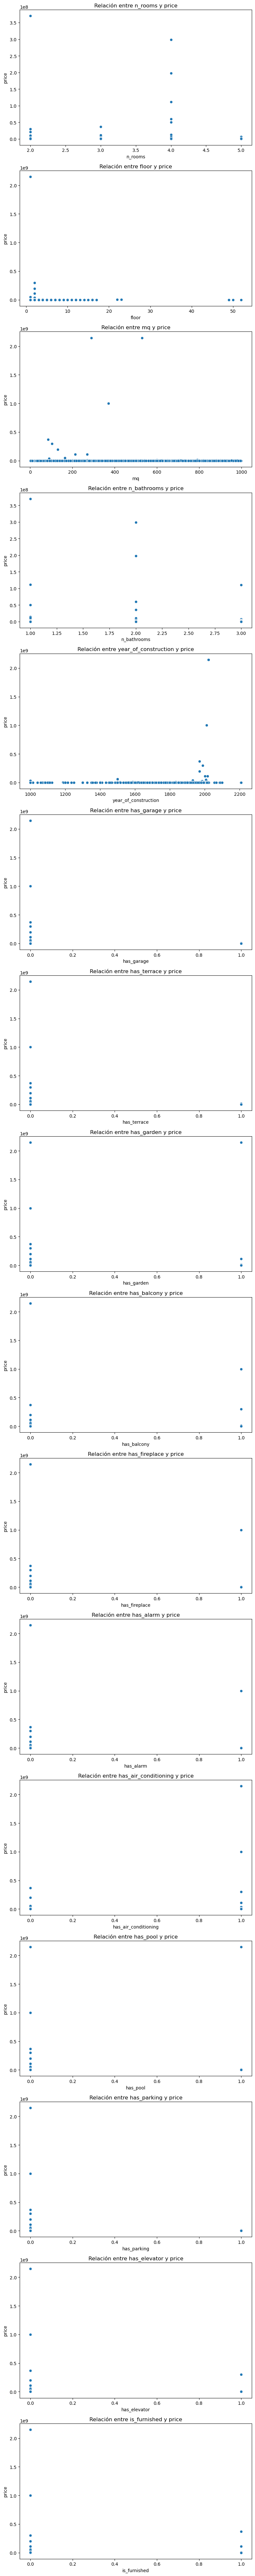

In [9]:
# Lista de las variables comparar con 'price'
variables = ['n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction',
             'has_garage', 'has_terrace', 'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 
             'has_air_conditioning', 'has_pool', 'has_parking', 'has_elevator', 'is_furnished']

# Crear subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 5 * len(variables)))

# Crear un gráfico de dispersión para cada variable contra 'price'
for i, var in enumerate(variables):
    sns.scatterplot(data=df, x=var, y='price', ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y price')

# Ajustar el diseño
plt.tight_layout()
plt.show()

# Limpieza de datos

In [10]:
# 1. Eliminar las filas donde 'price' es nulo (variable objetivo)
df_cleaned = df.dropna(subset=['price'])
df_cleaned = df_cleaned.dropna(subset=['year_of_construction'])
df_cleaned = df_cleaned.dropna(subset=['floor'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118799 entries, 10 to 213408
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             118799 non-null  float64
 1   location              118799 non-null  object 
 2   title                 118799 non-null  object 
 3   price                 118799 non-null  float64
 4   n_rooms               89661 non-null   float64
 5   floor                 118799 non-null  float64
 6   mq                    117264 non-null  float64
 7   n_bathrooms           112045 non-null  float64
 8   year_of_construction  118799 non-null  float64
 9   availability          118799 non-null  object 
 10  energy_class          118452 non-null  object 
 11  status                118799 non-null  object 
 12  heating               118799 non-null  object 
 13  has_garage            118799 non-null  int64  
 14  has_terrace           118799 non-null  int64  
 15  has_

In [11]:
for col in cat_col:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna location: 7023 subniveles
Columna title: 190951 subniveles
Columna availability: 1 subniveles
Columna energy_class: 12 subniveles
Columna status: 1 subniveles
Columna heating: 2 subniveles


Status no aporta información para diferenciar entre casas.

In [12]:
# 4. Eliminar columnas irrelevantes como 'timestamp', 'title', 'status', 'availability'
df_cleaned = df_cleaned.drop(columns=['timestamp', 'title', 'status','availability'])

In [13]:
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum()

location                0
price                   0
n_rooms                 0
floor                   0
mq                      0
n_bathrooms             0
year_of_construction    0
energy_class            0
heating                 0
has_garage              0
has_terrace             0
has_garden              0
has_balcony             0
has_fireplace           0
has_alarm               0
has_air_conditioning    0
has_pool                0
has_parking             0
has_elevator            0
is_furnished            0
latitude                0
longitude               0
price_per_mq            0
property_age            0
dtype: int64

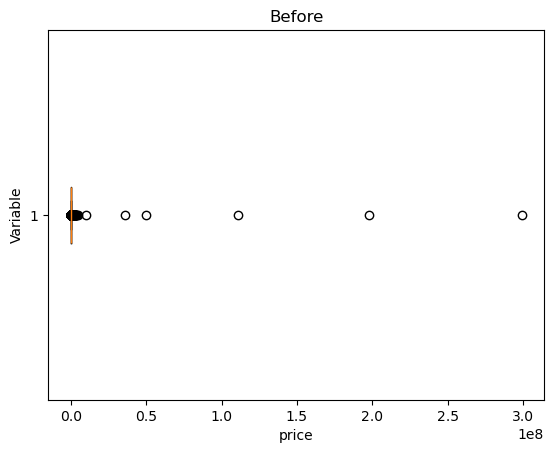

In [14]:
plt.boxplot(df_cleaned['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [15]:
# calculate summary statistics
mean = df_cleaned['price'].mean()
std  = df_cleaned['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df_1 = df_cleaned[df_cleaned['price'] <= upper_bound]

Upper Bound : 2742492.574577012


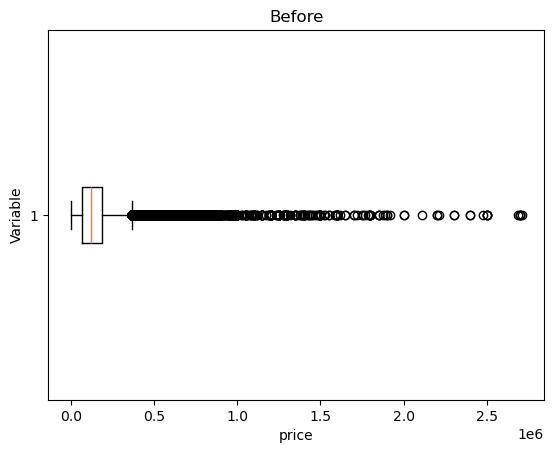

In [16]:
plt.boxplot(df_1['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [17]:
# calculate summary statistics
mean = df_1['price'].mean()
std  = df_1['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df_2 = df_1[df_1['price'] <= upper_bound]

Upper Bound : 421108.9644624964


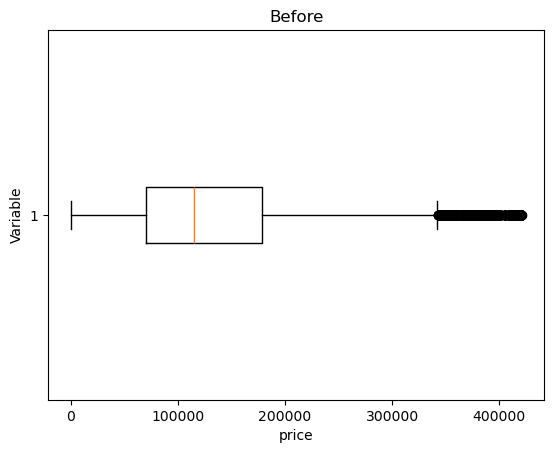

In [18]:
plt.boxplot(df_2['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [19]:
# calculate summary statistics
mean = df_2['price'].mean()
std  = df_2['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df_3 = df_2[df_2['price'] <= upper_bound]

Upper Bound : 307406.8314886767


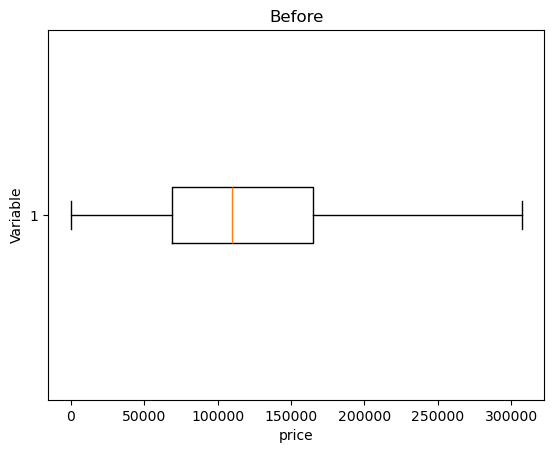

In [20]:
plt.boxplot(df_3['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [21]:
# Eliminar filas con 0 en la cantidad de cuartos
df_5 = df_3[df_3['n_rooms'] > 0]
print(df_5.shape)

(80031, 24)


In [22]:
# Columnas numericas
print("Before: ",num_col)
num_col.remove('price')
num_col.remove('timestamp')
num_col.remove('latitude')
num_col.remove('longitude')
print("\nAfter: ",num_col)

cat_col.remove('status')
cat_col.remove('title')
cat_col.remove('availability')

Before:  ['timestamp', 'price', 'n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'latitude', 'longitude', 'price_per_mq', 'property_age']

After:  ['n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'price_per_mq', 'property_age']


In [23]:
df_5.head()

,location,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,energy_class,heating,has_garage,...,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude,price_per_mq,property_age
10,zumpano,90000.0,5.0,2.0,124.0,2.0,2002.0,e,autonomous,0,...,0,0,0,0,0,1,39.310894,16.292094,725.806452,22.0
13,zumpano,59000.0,4.0,3.0,127.0,1.0,2001.0,d,autonomous,0,...,0,1,0,0,1,0,39.310894,16.292094,464.566929,23.0
15,zafferana etnea,65000.0,2.0,3.0,45.0,1.0,1950.0,g,autonomous,0,...,0,0,0,0,0,0,37.693285,15.106460,1444.444444,74.0
16,zafferana etnea,120000.0,2.0,3.0,45.0,1.0,1900.0,g,autonomous,0,...,0,0,0,1,0,0,37.693285,15.106460,2666.666667,124.0
17,vinchiaturo,22000.0,2.0,3.0,70.0,1.0,1900.0,g,autonomous,0,...,0,0,0,0,0,0,41.492925,14.590729,314.285714,124.0


# Reducción de dimensionlidad

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

y = df_5['price'].values

label_encoder = LabelEncoder()
X_encoded = df_5[cat_col].apply(lambda col: LabelEncoder().fit_transform(col))

# ** para expandir las columnas numéricas como argumentos de palabra clave dentro de assign(), de modo que se añadan correctamente.
X_complete = X_encoded.assign(**df_5[num_col])

print(len(y))
print(len(X_complete))

print(y)
print(X_complete)

80031
80031
[ 90000.  59000.  65000. ... 130000. 210000. 220000.]
        location  energy_class  heating  n_rooms  floor     mq  n_bathrooms  \
10          6562             9        0      5.0    2.0  124.0          2.0   
13          6562             8        0      4.0    3.0  127.0          1.0   
15          6525            11        0      2.0    3.0   45.0          1.0   
16          6525            11        0      2.0    3.0   45.0          1.0   
17          6473            11        0      2.0    3.0   70.0          1.0   
...          ...           ...      ...      ...    ...    ...          ...   
213402       431            11        0      4.0    1.0  128.0          1.0   
213404       431            10        0      2.0    1.0   50.0          1.0   
213405       431            10        0      4.0    1.0  190.0          2.0   
213406       431             8        0      3.0    1.0   80.0          1.0   
213408       431             2        0      3.0    4.0  111.0   

In [25]:
X_complete = X_complete - X_complete.mean()

Se centra el conjunto de datos

# PCA

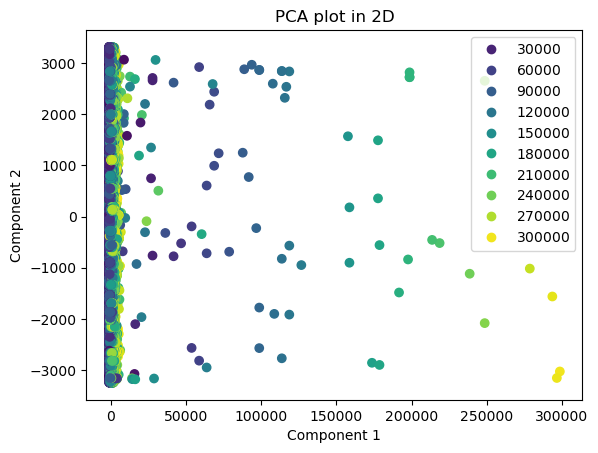

In [26]:
from sklearn.decomposition import PCA


X_PCA = PCA(n_components=2).fit_transform(X_complete)


scatter = plt.scatter(X_PCA[:,0], X_PCA[:,1], c=y)
plt.title('PCA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())

#fig = plt.figure()
#ax = plt.axes(projection ="3d")

#ax.scatter3D(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2], c=y)
#plt.title("PCA plot in 3D")

plt.show()

## LDA

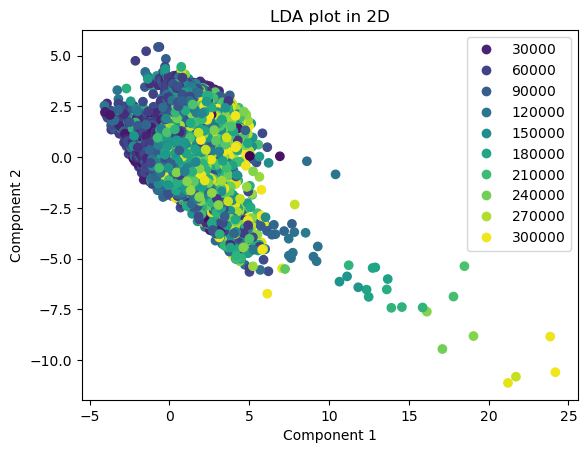

In [27]:
X_LDA = LDA(n_components=2).fit_transform(X_complete,y)

scatter = plt.scatter(X_LDA[:,0], X_LDA[:,1], c=y)
plt.title('LDA plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())

#fig = plt.figure()
#ax = plt.axes(projection ="3d")

#ax.scatter3D(X_LDA[:,0], X_LDA[:,1], X_LDA[:,2], c=y)
#plt.title("LDA plot in 3D")
plt.show()

# t-SNE

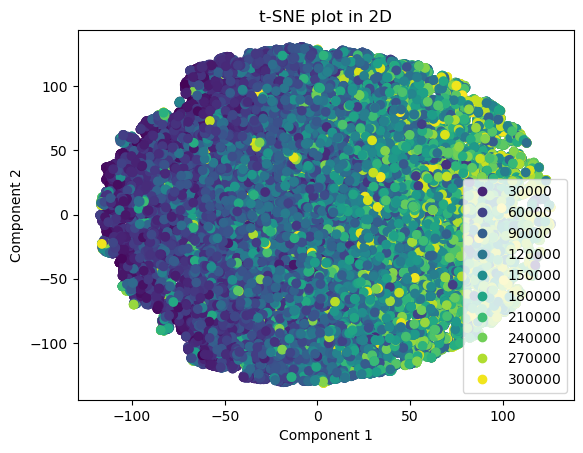

In [30]:
from sklearn.manifold import TSNE

X_TSNE = TSNE(n_components=2,perplexity=10, early_exaggeration=12, learning_rate='auto', init='pca',n_jobs=8).fit_transform(X_complete)

scatter = plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y)
plt.title('t-SNE plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())

#fig = plt.figure()
#ax = plt.axes(projection ="3d")

#ax.scatter3D(X_TSNE[:,0], X_TSNE[:,1], X_TSNE[:,2], c=y)
#plt.title("t-SNE plot in 3D")

plt.show()


# UMAP

2024-10-01 20:07:47.252698: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 20:07:47.264417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 20:07:47.268009: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 20:07:47.277044: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


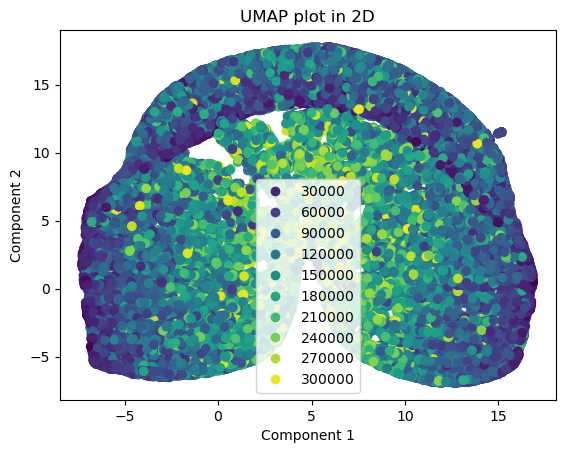

In [31]:
from umap import UMAP

X_UMAP = UMAP(n_components=2).fit_transform(X_complete)

scatter = plt.scatter(X_UMAP[:,0], X_UMAP[:,1], c=y)
plt.title('UMAP plot in 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(*scatter.legend_elements())

#fig = plt.figure()
#ax = plt.axes(projection ="3d")

#ax.scatter3D(X_UMAP[:,0], X_UMAP[:,1], X_UMAP[:,2], c=y)
#plt.title("UMAP plot in 3D")

plt.show()

# Selección de características

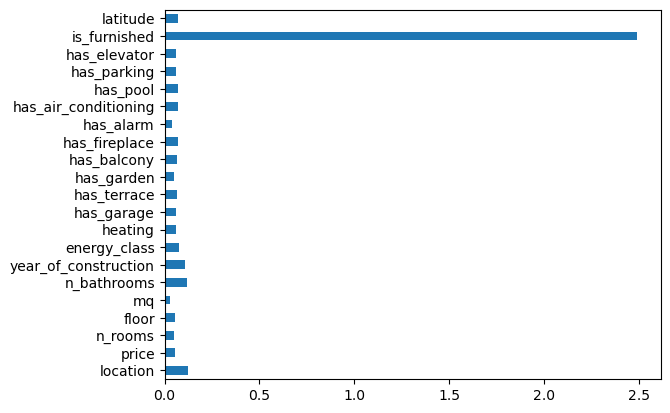

In [28]:
from sklearn.feature_selection import mutual_info_classif

### Applying feature selection method
X_new = mutual_info_classif(X_complete,y)

# plot feature selection
feat_imp = pd.Series(X_new, index=df_5.columns[:len(X_new)])
feat_imp.plot(kind='barh')
plt.show()

In [30]:
from sklearn.feature_selection import VarianceThreshold

#X = df_4.iloc[:, 0:-1]
### Applying feature selection method
sel = VarianceThreshold(threshold=0.16)
sel.fit_transform(X_complete)

# show feature selection
selected_features = sel.get_support()
print('The selected features are:', list(X_complete.columns[selected_features]))


The selected features are: ['location', 'energy_class', 'n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_air_conditioning', 'price_per_mq', 'property_age']


# No se puede correr en mi lap
``` pythhon3
from sklearn.ensemble import RandomForestClassifier

### Applying feature selection method
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_complete, y)

# show feature selection
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=df_4.columns[:len(X_complete)])

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title('Feature selection using Random Forest')
plt.show()
```

``` python3
import warnings
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    ### Applying feature selection method
    efs = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=1, max_features=4) #change max_features
    efs = efs.fit(X, y)

    # show feature selection
    print('The selected features are:', efs.best_feature_names_)
```

# Modelos de regresión

In [31]:
from sklearn.model_selection import train_test_split

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(X_complete, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

ffs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward')
ffs.fit(X_complete, y)

# show feature selection
selected_features = ffs.get_support()
print('The selected features are:', list(X_complete.columns[selected_features]))

The selected features are: ['energy_class', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 'has_garden', 'has_alarm', 'has_elevator', 'price_per_mq']


In [33]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))

0.24643048485916963


In [34]:
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(X_train)

[-3.34229709e-01 -3.77604945e+03  1.07872352e+04  4.33157087e+03
  8.13097442e+02  1.99881640e+02  3.11572001e+04  4.47770488e+01
  8.01679202e+03  1.14707501e+04  1.15268806e+04 -1.52323091e+03
 -6.85981752e+03  3.67113280e+04 -8.93177674e+02  3.24181051e+04
 -7.93129245e+03  1.25794610e+04 -2.57412502e+02  2.90567180e+00
 -4.47770488e+01]
122319.29955431014


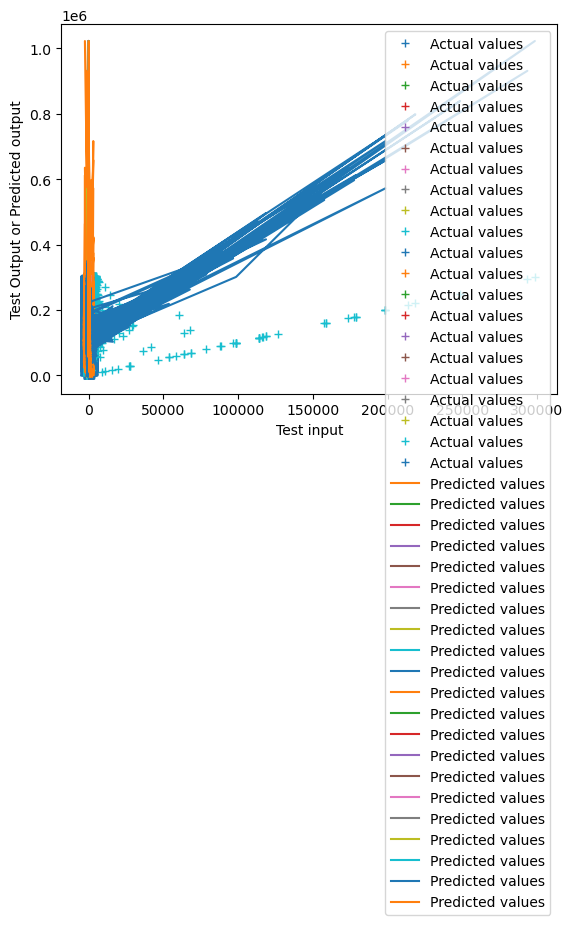

In [35]:
# Plot the regression line with actual data pointa
plt.plot(X_train, y_train, '+', label='Actual values')
plt.plot(X_train, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import r2_score
print(f'R^2: {r2_score(y_train, y_pred)}')


R^2: 0.24643048485916963


In [37]:
# Function to evaluate models and plot predictions
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f'Model: {model_name}')
    print(f'Train R^2: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Test R^2: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}')
    print('-'*40)
    
    # Plot the predictions vs real values
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test, y_pred_test, label='Predictions', color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {model_name}')
    plt.legend()
    plt.show()

Model: Linear Regression
Train R^2: 0.2464
Test R^2: 0.2267
Test RMSE: 61164.7357
----------------------------------------


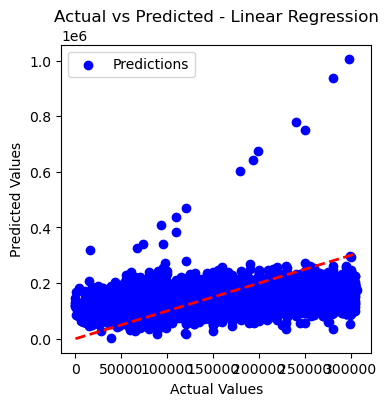

Model: Ridge Regression
Train R^2: 0.2464
Test R^2: 0.2267
Test RMSE: 61164.6771
----------------------------------------


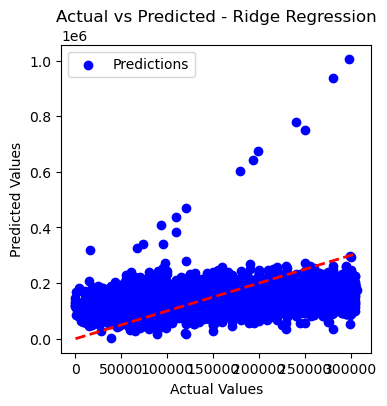

Model: Lasso Regression
Train R^2: 0.2464
Test R^2: 0.2267
Test RMSE: 61164.7215
----------------------------------------


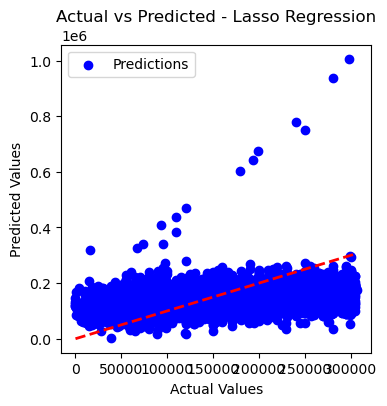

Model: Random Forest Regression
Train R^2: 0.9999
Test R^2: 0.9996
Test RMSE: 1461.8551
----------------------------------------


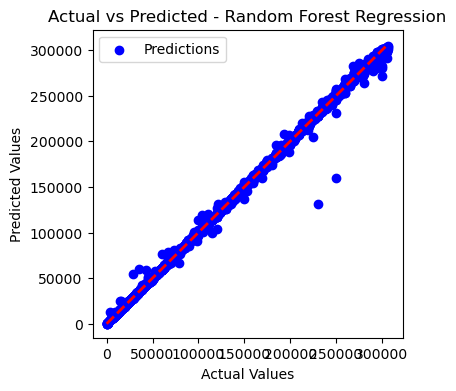

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Linear Regression
linear_reg = LinearRegression()
evaluate_model(linear_reg, X_train, X_test, y_train, y_test, 'Linear Regression')

# 2. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
evaluate_model(ridge_reg, X_train, X_test, y_train, y_test, 'Ridge Regression')

# 3. Lasso Regression
lasso_reg = Lasso(alpha=0.1)
evaluate_model(lasso_reg, X_train, X_test, y_train, y_test, 'Lasso Regression')

# 4. Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_reg, X_train, X_test, y_train, y_test, 'Random Forest Regression')

# Test

In [60]:
# Cargar el dataset de prueba
test_data = pd.read_csv('./test_housing_data_italy.csv')

# Verificar las primeras filas del conjunto de prueba
print(test_data.head())


      timestamp               location  \
0  1.661122e+09               caravino   
1  1.661116e+09               valbrona   
2  1.661119e+09    altavilla vicentina   
3  1.661119e+09  san giovanni lupatoto   
4  1.661138e+09         sant'anastasia   

                                               title     price  n_rooms  \
0      appartamento via perosio 26, centro, caravino   95000.0      5.0   
1                     trilocale via milano, valbrona   99000.0      3.0   
2  villa a schiera via rocche, centro, altavilla ...  135000.0      5.0   
3  quadrilocale via gaetano tortelli 2, raldon, s...  180000.0      4.0   
4  quadrilocale via degli archi augustei, cavalla...       NaN      4.0   

   floor     mq  n_bathrooms  year_of_construction      availability  ...  \
0    3.0  190.0          2.0                1967.0  not free / other  ...   
1    1.0   80.0          1.0                1970.0  not free / other  ...   
2    NaN  210.0          1.0                1965.0  not free / ot

In [61]:
test_data = test_data.dropna()

In [62]:
# Aplicar el preprocesamiento correspondiente (por ejemplo, imputación y escalado)
test_data['price_per_mq'] = test_data['price'] / test_data['mq']
test_data['property_age'] = 2024 - test_data['year_of_construction']

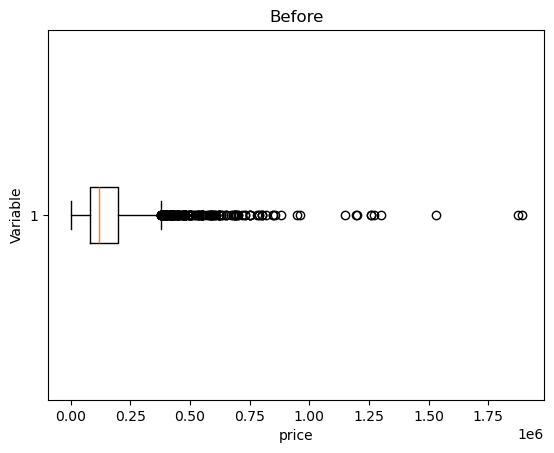

In [63]:
plt.boxplot(test_data['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [64]:
# calculate summary statistics
mean = test_data['price'].mean()
std  = test_data['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
test_1 = test_data[test_data['price'] <= upper_bound]

Upper Bound : 421277.67397872434


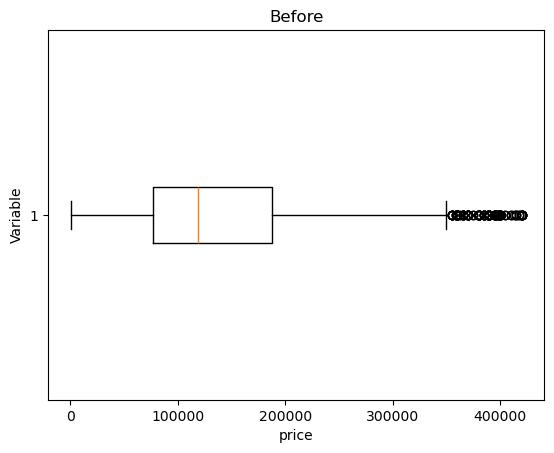

In [65]:
plt.boxplot(test_1['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [66]:
# calculate summary statistics
mean = test_1['price'].mean()
std  = test_1['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
test_2 = test_1[test_1['price'] <= upper_bound]

Upper Bound : 316276.5994015356


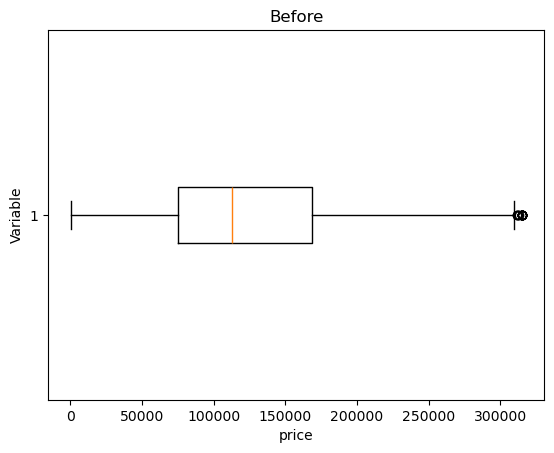

In [67]:
plt.boxplot(test_2['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [68]:
# calculate summary statistics
mean = test_2['price'].mean()
std  = test_2['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
test_3 = test_2[test_2['price'] <= upper_bound]

Upper Bound : 268015.88066359545


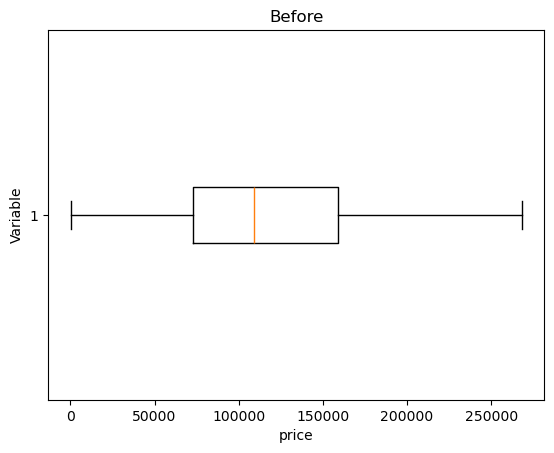

In [69]:
plt.boxplot(test_3['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [70]:
test_data = test_data.dropna(subset=['price'])
test_data = test_data.dropna(subset=['year_of_construction'])
test_data = test_data.dropna(subset=['floor'])

In [71]:
y_true = test_3['price'].values

In [72]:
test_data = test_data.drop(columns=['timestamp', 'title', 'status','availability','longitude', 'latitude', 'price'])


In [73]:
#Se toman las mismas columnas que las del entrenamiento
test_data = test_data[X_train.columns]
print(test_data)

               location energy_class     heating  n_rooms  floor     mq  \
0              caravino            g  autonomous      5.0    3.0  190.0   
1              valbrona            e  autonomous      3.0    1.0   80.0   
5            sedegliano            f  autonomous      5.0    3.0  128.0   
6               mappano            c  autonomous      5.0    2.0  105.0   
10          esanatoglia            a  autonomous      4.0    2.0  195.0   
...                 ...          ...         ...      ...    ...    ...   
9993              udine           a4  autonomous      3.0    3.0  184.0   
9994            rubiana            g  autonomous      5.0    2.0  120.0   
9995             rubano            g  autonomous      4.0    2.0  166.0   
9996  tizzano val parma            g  autonomous      5.0    2.0  247.0   
9997  montalto carpasio            g  autonomous      2.0    1.0   60.0   

      n_bathrooms  year_of_construction  has_garage  has_terrace  ...  \
0             2.0         

In [74]:
# Codificar categoricos
cat_col = [col for col in test_data.columns if test_data[col].dtype == 'object']

test_data[cat_col] = test_data[cat_col].apply(lambda col: LabelEncoder().fit_transform(col))

In [75]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
 # defining the dependent and independent variables
X_test = test_data[[col for col in test_data.columns if test_data[col].dtype != 'object']]
y_test = y_true

In [76]:
# Predicciones usando los modelos entrenados

# Regresión lineal
y_test_pred_linear = linear_reg.predict(X_test)

# Regresión Ridge
y_test_pred_ridge = ridge_reg.predict(X_test)

# Bosque aleatorio
y_test_pred_rf = rf_reg.predict(X_test)


In [77]:
from sklearn.metrics import r2_score

# Calcular el R² para cada modelo
r2_linear_test = r2_score(y_true, y_test_pred_linear)
r2_ridge_test = r2_score(y_true, y_test_pred_ridge)
r2_rf_test = r2_score(y_true, y_test_pred_rf)

# Imprimir los resultados
print(f"R² de Regresión Lineal en test: {r2_linear_test}")

print(f"R² de Regresión Ridge en test: {r2_ridge_test}")
print(f"R² de Bosque Aleatorio en test: {r2_rf_test}")

ValueError: Found input variables with inconsistent numbers of samples: [3679, 4274]

# Discusión

El presente trabajo tuvo como objetivo predecir el precio de las casas en Italia utilizando un conjunto de datos que contenía diversas características de las propiedades. En el cual se realizó la limpieza de datos, análisis exploratorio y modelado predictivo, culminando en la evaluación de varios modelos de regresión.

## Limpieza de datos y análisis exploratorio

La limpieza de datos es fundamental para garantizar la calidad del análisis. Se abordaron valores faltantes y se transformaron variables que podrían afectar la precisión del modelo. El análisis exploratorio reveló patrones significativos, como la correlación entre el número de habitaciones y el precio, así como la influencia de la antigüedad de la propiedad en el valor de venta.
Creación de nuevos atributos

Se crearon dos nuevos atributos: el precio por metro cuadrado y la antigüedad de la propiedad para intentar mejorar el modelo.

## Reducción de dimensionalidad

La aplicación de PCA (Análisis de Componentes Principales), LDA, T-SNE y UMAP permitió simplificar el modelo y visualizar mejor los datos, facilitando la interpretación de los resultados.

## Selección de características

Se utilizó la selección de características mediante métodos basados en correlación y modelos de regresión. La identificación de las variables más influyentes en la predicción del precio de las casas fue crucial para enfocarse en las características relevantes y eliminar las redundantes.
Modelado y evaluación

Se entrenaron cuatro modelos de regresión diferentes: regresión lineal, regresión Lasso, regresión Ridge y Random Forest. Cada modelo se evaluó utilizando la métrica R2R2. Los resultados aceptables aunque poco satisfactorios, lo que indica que hay mucho que mejorar desde la limpieza de datos para eliminar los datos innecesarios y usar alguna medida para los datos faltantes bien con la media o la mediana para poder rellenar esos datos faltantes, ya que no se pudo obtener un modelo con una métrica acéptale.

## Comparación con el conjunto de prueba

Al aplicar los modelos al conjunto de datos de prueba, los resultados desafortunadamente no fueron para nada satisfactorios, lo que indica que hay una gran falta de experiencia por mi parte para realizar de manera adecuada la clasificación correcta de datos al igual que la creación de nuevos datos útiles para el modelo de igual manera al aplicar el test muy probablemente me este equivocando al implementarlo.

## Conclusiones

En conclusión, el trabajo realizado proporcionó una visión integral sobre los factores que influyen en el entrenamiento de un modelo de aprendizaje para realizar predicciones a futuro con diversas técnicas. La combinación de técnicas de limpieza de datos, análisis exploratorio y modelado predictivo es efectiva para abordar el problema de predicción del precio de las propiedades si se realiza de manera correcta y profunda. Aunque el resultado final de las predicciones en el test no fue el esperado, se ganó experiencia e interés para practicar y mejorar, esperando no tener mayores problemas a futuro realizando este tipo de trabajos de manera efectiva.
